## Assignment 2: System Dynamics.
**Course:** Simulation Modeling of Financial and Economic Systems <br>
**Student:** Danis Alukaev <br>
**Email:** d.alukaev@innopolis.university <br>
**Group:** B19-DS-01 <br>

### 0. Prerequisites

In [ ]:
%pip install pysd

In [1]:
import pysd
import matplotlib.pyplot as plt
import numpy as np

### 1. Importing model

In [2]:
model = pysd.load('./bass.py')

In [3]:
model.doc().head()

,Real Name,Py Name,Unit,Lims,Type,Subs,Eqn,Comment
0,Competitor Customers,competitor_customers,person,"(None, None)",component,None,"INTEG(-competitor gain, 0)",
1,Competitor Customers -> Our Customers,competitor2our,person,"(None, None)",component,None,luring_threshold * efficiency_word_of_mouth * ...,
2,Competitor Customers -> Potential Customers,competitor2potential,person,"(None, None)",component,None,competitor_customers * p23 * share_dissatisfied,
3,Concentration of Potential Customers,potential_customers_concentration,float,"(None, None)",component,None,Potential Customers / Total Market,
4,Demand from Marketing,marketing_demand,person,"(None, None)",component,None,Efficiency Marketing / Potential Customers,


In [4]:
def run_model(model, params=None, return_columns=None):
    """
    Method that simulates the system dynamics using Bass model.
    The model is flexible, so that you can configure (a) the time
    simulation will be running, (b) probabilities P11 P13 P21 P23, 
    (c) Efficiency of marketing and word of mouth (WoM), and (d) so-
    ciability. 
    User can restrict the columns to be returned.

    :param model: Bass model loaded from ./bass.py
    :param params: dict with configurations (a-d)
    :return_columns: columns of interest
    :return: values of intersted attributes at each point in time    
    """
    model.reload()
    if return_columns is None:
        return_columns = ['Potential Customers', 'Our Customers', 'Competitor Customers']
    kwargs = {'return_columns': return_columns}
    if params is not None:
        kwargs['params'] = params
    values = model.run(**kwargs)
    return values

In [5]:
def plot_chart(values):
    """
    The method that plots chart for a given values.
    The input should produced by run_model function, and
    contain columns 'Potential Customers', 'Our 
    Customers', 'Competitor Customers'.

    :param values: values to be plotted
    """
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 12)
    ax1.set_title(f"Market Segmentation")
    ax1.grid(linestyle="--")
    ax1.set_xlabel("Month")
    ax1.set_ylabel("Data")
    values_len = len(values)
    labels = ['Potential Customers', 'Our Customers', 'Competitor Customers']
    colors = ['g', 'b', 'r']

    for label, color in zip(labels, colors):
        ax1.plot(np.arange(values_len), values[label], '-', label=label, c=color)
    ax1.legend()
    plt.show() 

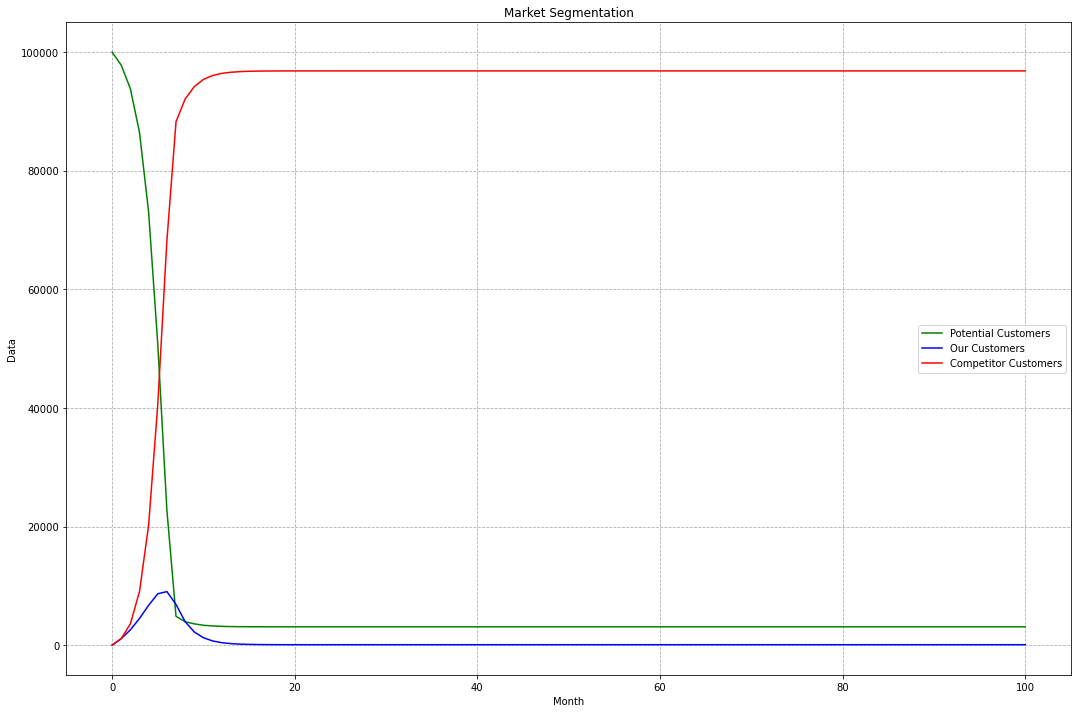

In [6]:
config = {
    "final_time": 40,
    "p11": 0.4,
    "p13": 0.5,
    "p21": 0.9,
    "p23": 0.1,
    "efficiency_word_of_mouth": 0.015,
    "efficiency_marketing": 0.011,
    "sociability": 100
}


values = run_model(model, params=config)
plot_chart(values)